# Investigating the popularity of the Netflix series 'The Office'

## Description of the dataset

The dataset contains information on a variety of characteristics of each episode. In detail, these are:

   - **episode_number:** Canonical episode number.
   - **season:** Season in which the episode appeared
   - **episode_title:** Title of the episode.
   - **description:** Description of the episode.
   - **ratings:** Average IMDB rating.
   - **votes:** Number of votes.
   - **viewership_mil:** Number of US viewers in millions.
   - **duration:** Duration in number of minutes.
   - **release_date:** Airdate.
   - **guest_stars:** Guest stars in the episode (if any).
   - **director:** Director of the episode.
   - **writers:** Writers of the episode
   - **has_guests:** True/False column for whether the episode contained guest stars.
   - **scaled_ratings:** The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Use seaborn default parameters
sns.set()

df = pd.read_csv('datasets/office_episodes.csv', parse_dates = ['release_date'])

In [34]:
df.shape

(188, 14)

In [62]:
df.isna().sum()

episode_number      0
season              0
episode_title       0
description         0
ratings             0
votes               0
viewership_mil      0
duration            0
release_date        0
guest_stars       159
director            0
writers             0
has_guests          0
scaled_ratings      0
dtype: int64

Equivalence check between **guest-stars** and **has_guests** columns.

In [5]:
with_guests = df[df['has_guests']]
without_guests = df[~df['has_guests']]
print(with_guests.has_guests.mean())
print(without_guests.has_guests.mean())

1.0
0.0


# 1. Data visualization


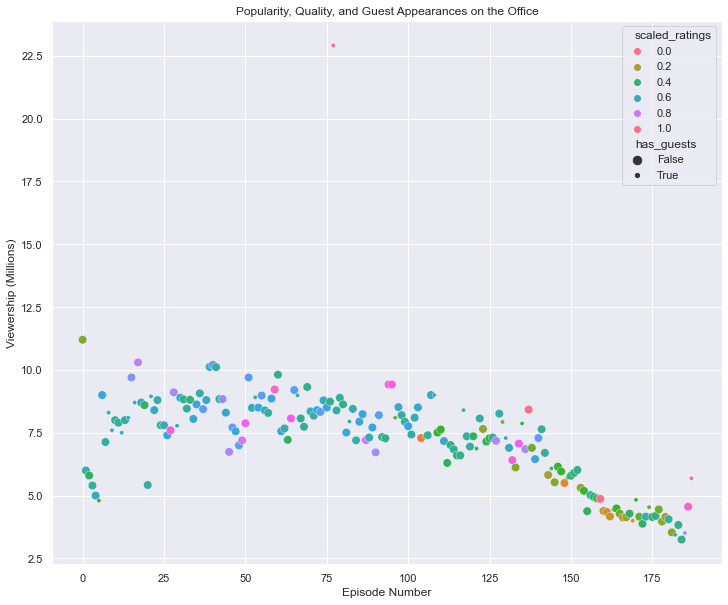

In [6]:
# define the figure
fig = plt.figure(figsize=(12,10))

# Create the scatter plot
sns.scatterplot(x = 'episode_number', y = 'viewership_mil', hue='scaled_ratings', 
size='has_guests', data=df, palette='husl')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

This plot shows a drop in viwership accross episodes over time. Plotting the average viewership per season will make this clearer.

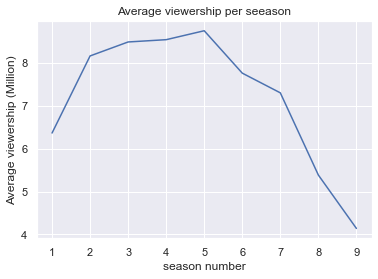

In [63]:
seasons = df.groupby('season')
seasons.viewership_mil.mean().plot()
plt.xlabel('season number')
plt.ylabel('Average viewership (Million)')
plt.title('Average viewership per seeason')
plt.show()

The plot tells us that the popularity of 'The Office' has increased until season 5 after what it decresed steadily. This suggests that the quality of the series has significantly dropped. We might think that the fans have got tired and disgusted by the series because of its length, or the duration of the episodes became too high. The plot of the average episodes duration per season will tells us more.  

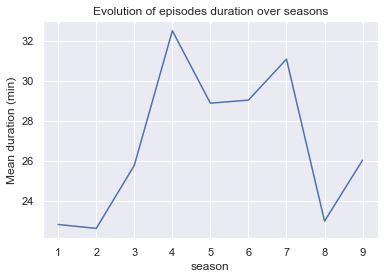

In [64]:
seasons.duration.mean().plot()
plt.ylabel('Mean duration (min)')
plt.title('Evolution of episodes duration over seasons')
plt.show()

The shape of this curve denies the hypothesis of drop in viewership because of the increasing lenght of the episodes over time. We can see that the mean duration of episodes globally decreased from season 5.  

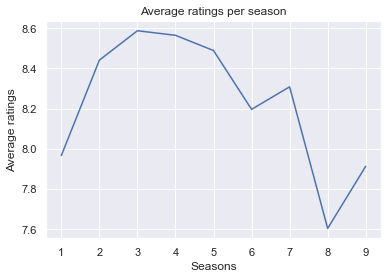

In [67]:
seasons.ratings.mean().plot()
plt.xlabel('Seasons')
plt.ylabel('Average ratings')
plt.title('Average ratings per season')
plt.show()

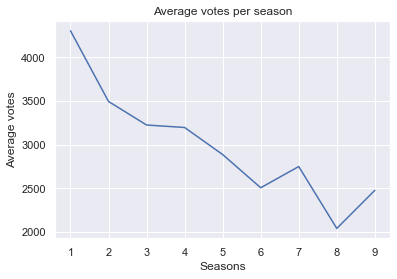

In [65]:
seasons.votes.mean().plot()
plt.xlabel('Seasons')
plt.ylabel('Average votes')
plt.title('Average votes per season')
plt.show()

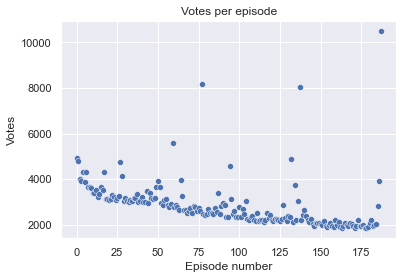

In [11]:
sns.scatterplot(x='episode_number', y='votes', data=df)
plt.xlabel('Episode number')
plt.ylabel('Votes')
plt.title('Votes per episode')
plt.show()

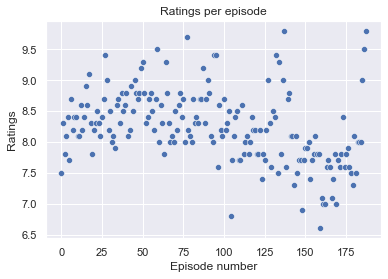

In [66]:
sns.scatterplot(x='episode_number', y='ratings', data=df)
plt.xlabel('Episode number')
plt.ylabel('Ratings')
plt.title('Ratings per episode')
plt.show()

Along with the viewership, the votes has decreased ocer time but unlike the viewership, the decay was steady from the begining till the end, with few spikes.

# 2. Guest stars appearing in the most watched episode of **The Office** 

In [17]:
# retrieve the maximum scaled rating
max_view = max(df['viewership_mil'])

# Select episodes with maw_view and guests
most_watched = df.loc[df['viewership_mil']==max_view]

# Select most watched episodes having guests
most_watched_with_guests = most_watched[most_watched['has_guests']==True]

# Draw list of guests
guest = most_watched_with_guests['guest_stars'].values.item().split(', ')

# Randomly pick one guest_star's name from the list
idx = np.random.randint(1,len(guests))

top_star_random = guest[idx]
# print(top_star)

In [68]:
guest

'Joan Cusack, Ed Begley Jr, Rachel Harris, Nancy Walls'

You can read more about this anlysis <a href="https://www.datainsightonline.com/post/investigating-the-popularity-of-the-netflix-series-the-office">here</a>